In [1]:
using Pkg
Pkg.activate(".")
using Luxor
using MathTeXEngine
using LaTeXStrings

  Activating project at `~/MEGA/EMAp/Mathematical-Short-Notes/Fields/Category-Theory/notebooks`
┌ Warning: Package Luxor does not have MathTeXEngine in its dependencies:
│ - If you have Luxor checked out for development and have
│   added MathTeXEngine as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with Luxor
│ Loading MathTeXEngine into Luxor from project dependency, future warnings for Luxor are suppressed.
└ @ nothing nothing:984


rad2deg(θ) = 0.0
1
rad2deg(θ) = 180.0
1
rad2deg(θ) = -90.0
4
rad2deg(θ) = 90.0
4
rad2deg(θ) = -45.0
2
rad2deg(θ) = -135.0
3
rad2deg(θ) = 45.0
3
rad2deg(θ) = 135.0
2


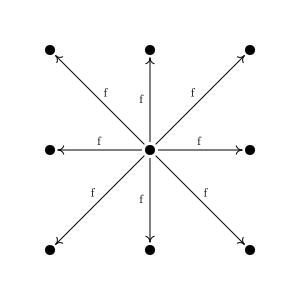

In [76]:
function quiverarrow(shaftendpoint, endpoint, shaftangle)
    @layer begin
        r = 6
        setlinecap("round")
        translate(endpoint)
        rotate(shaftangle-π)
        # setline(1)
        
        c1  = Point(0,-r)
        p1 = c1 + r*Point(cos(π/10), sin(π/10))
        p2 = O
        
        arc2r(c1,p1,p2,:stroke)

        c2  = Point(0,r)
        p3 = c2 + r*Point(cos(-π/10), sin(-π/10))
        arc2r(c2,p2,p3,:stroke)
    end
end

function anglepoints(pt1::Point, pt2::Point)
    atan(-pt2.y + pt1.y, pt2.x-pt1.x)
end

"""
    morphism(dom::Point,cod::Point;label::AbstractString=L"f",linewidth=1)
Draws the morphism arrow between two objects.
"""
function morphism(dom::Point,cod::Point;morphismlabel=L"f",linewidth=1, offset=8)
    θ  = anglepoints(dom,cod)
    o1 = offset*Point(cos(θ),-sin(θ))
    o2 = offset*Point(-cos(θ),sin(θ))
    
    p1 = dom + o1
    p2 = cod + o2
    
    arrow(p1,p2,linewidth=linewidth, arrowheadlength = 0,
        arrowheadfunction = quiverarrow)
    
    @show rad2deg(θ)
    
    if  -40 ≤ rad2deg(θ) ≤ 40 || 140 ≤ rad2deg(θ) ≤ 220 || -220 ≤ rad2deg(θ) ≤ -140
        println(1)
        label(morphismlabel,:N,(p1+p2)/2, offset=5)
    elseif  90 < rad2deg(θ) < 140 || -40 > rad2deg(θ) > -90
        println(2)
        label(morphismlabel,:NE,(p1+p2)/2, offset=5)
    elseif  40 < rad2deg(θ) < 90 || -140 < rad2deg(θ) < -90
        println(3)
        label(morphismlabel,:NW,(p1+p2)/2, offset=5)
    elseif rad2deg(θ) ≈ 90 || rad2deg(θ) ≈ 270 || rad2deg(θ) ≈ -90 || rad2deg(θ) ≈ -270
        println(4)
        label(morphismlabel,:W,(p1+p2)/2, offset=5)
    end
end

"""
    morphism(domcod::Point;label::AbstractString=L"f",linewidth=1)
Draws the morphism arrow where dom(f) = cod(f).
"""
function morphism(domcod::Point;morphismlabel::AbstractString=L"id",linewidth=1)
    arrow(domcod + Point(-8,-2),domcod + Point(-50,-50), domcod+ Point(50,-50),domcod+Point(8,-2),linewidth=1,
        arrowheadlength = 0,
        arrowheadfunction = quiverarrow)
    label(morphismlabel,:N, Point(0,-32), offset=10)
end

d = Drawing(300,300,:svg)
origin()
circle(O, 5,:fill)
fontsize(12)
# label(L"a",:S, offset=10)

# morphism(O)

p2 = Point(100,0)
circle(p2, 5,:fill)
morphism(O, p2)

p2 = Point(-100,0)
circle(p2, 5,:fill)
morphism(O, p2)

p2 = Point(0,100)
circle(p2, 5,:fill)
morphism(O, p2)

p2 = Point(0,-100)
circle(p2, 5,:fill)
morphism(O, p2)

p2 = Point(100,100)
circle(p2, 5,:fill)
morphism(O, p2)

p2 = Point(-100,100)
circle(p2, 5,:fill)
morphism(O, p2)

p2 = Point(100,-100)
circle(p2, 5,:fill)
morphism(O, p2)

p2 = Point(-100,-100)
circle(p2, 5,:fill)
morphism(O, p2)

finish()
d

In [35]:
θ = anglepoints(Point(0,0), Point(0,100))
8Point(cos(θ),-sin(θ))

-90.0

In [42]:
if 0 < abs(rad2deg(θ)) < 100
    println("ok")
end